In [145]:
import pandas as pd

In [146]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [147]:
#headers=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Money']
adult = pd.read_csv(url, header=None)
adult.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### 1. How many males and females are there?

In [149]:
adult[9].value_counts()

 Male      21790
 Female    10771
Name: 9, dtype: int64

 ### 2. What is the mean male age?

In [151]:
adult.groupby(9)[0].mean()[1]

39.43354749885268

### 3. What is the proportion of the US citizens?

In [153]:
adult[13].value_counts(normalize=True)[0]

0.895857006848684

### 4. Plot the distribution of people’s education as a bar plot.

In [154]:
#adult[3].unique()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: 3, dtype: int64

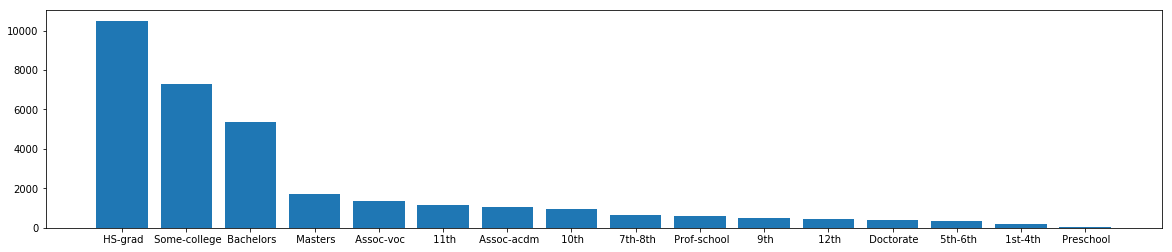

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
plt.bar(adult[3].value_counts().index, adult[3].value_counts())
adult[3].value_counts().sort_values(ascending=False)

###  5. What is the mean and standard deviation of the ”ﬁnal weight” for divorced people?

In [51]:
adult.groupby(5)[2].agg(['mean', 'std'])

,mean,std
5,,
Divorced,185802.790457,105646.789459
Married-AF-spouse,188165.565217,139868.801057
Married-civ-spouse,186763.172877,103097.543011
Married-spouse-absent,193141.760766,114937.598737
Never-married,195383.308996,107765.354649
Separated,206444.325854,117601.326229
Widowed,174159.042296,94005.379316


 ### 6. Is it true that the people who receive over 50k are mostly highly educated

In [163]:
high = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
adult.groupby(14)[3].value_counts()
# YES

14      3            
 <=50K   HS-grad         8826
         Some-college    5904
         Bachelors       3134
         11th            1115
         Assoc-voc       1021
         10th             871
         Assoc-acdm       802
         Masters          764
         7th-8th          606
         9th              487
         12th             400
         5th-6th          317
         1st-4th          162
         Prof-school      153
         Doctorate        107
         Preschool         51
 >50K    Bachelors       2221
         HS-grad         1675
         Some-college    1387
         Masters          959
         Prof-school      423
         Assoc-voc        361
         Doctorate        306
         Assoc-acdm       265
         10th              62
         11th              60
         7th-8th           40
         12th              33
         9th               27
         5th-6th           16
         1st-4th            6
Name: 3, dtype: int64

### 7. What is the maximum male and female age for each race?

In [164]:
adult.groupby([8, 9])[0].max()

8                    9      
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: 0, dtype: int64

### 8. The people from which countries work as farmers/ﬁshers?

In [166]:
adult.groupby(6)[13].value_counts()[' Farming-fishing'].index

Index([' United-States', ' Mexico', ' ?', ' Puerto-Rico', ' Guatemala',
       ' Philippines', ' Canada', ' Cuba', ' El-Salvador', ' Italy',
       ' Vietnam', ' Cambodia', ' England', ' France', ' Germany', ' Hong',
       ' Ireland', ' Japan', ' Poland', ' Portugal', ' Yugoslavia'],
      dtype='object', name=13)

### 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [100]:
gr = adult.groupby(9)[3].value_counts()
gr[' Male', ' Bachelors'] / gr[' Male', ' Masters']

3.14743049705139

In [102]:
gr[' Female', ' Bachelors'] / gr[' Female', ' Masters']

3.0205223880597014

### 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [111]:
adult[12].max()

99

In [134]:
# 99 - the largest number of hours a person works a week

In [168]:
adult[12].value_counts()[adult[12].max()]

85

In [138]:
# 85 people work 99 hours a week

In [169]:
adult.groupby(12)[14].value_counts()[99]

14
 <=50K    60
 >50K     25
Name: 14, dtype: int64

In [144]:
# income of 60 people from 85 is over 50K and income of the rest people is less 50K 